# Boston Housing Data
## Solved using Linear Regression

In [193]:
#import dependencies

import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import the data

In [194]:
boston_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv")

## Explore the data

Describe the data to read the distribution

In [195]:
boston_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.609125,8.875058,0.00906,0.081437,0.26139,3.202962,88.9762
ZN,404.0,11.569307,23.152481,0.00000,0.000000,0.00000,20.000000,100.0000
INDUS,404.0,10.985050,6.894618,0.74000,5.130000,8.56000,18.100000,27.7400
CHAS,404.0,0.071782,0.258447,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.556484,0.117704,0.38500,0.452000,0.53800,0.631000,0.8710
RM,404.0,6.315891,0.709452,3.86300,5.890500,6.21000,6.636750,8.7800
AGE,404.0,68.556436,27.994922,2.90000,45.550000,77.70000,93.650000,100.0000
DIS,404.0,3.808195,2.131226,1.12960,2.087875,3.17575,5.400800,12.1265
RAD,404.0,9.356436,8.589721,1.00000,4.000000,5.00000,12.000000,24.0000
TAX,404.0,404.032178,166.172655,187.00000,279.000000,330.00000,666.000000,711.0000


Plot the distributions

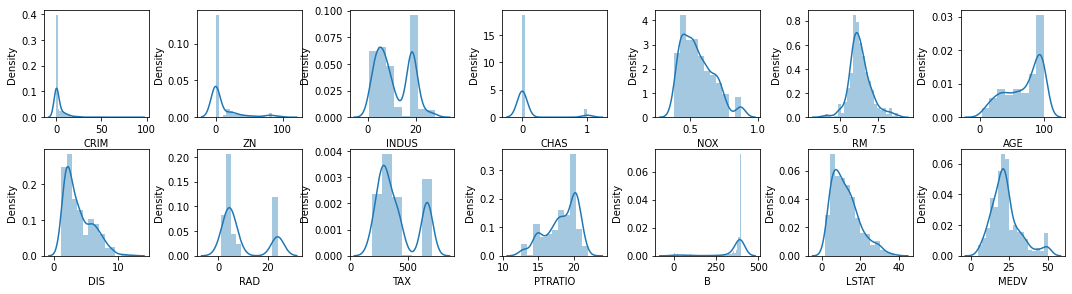

In [221]:
plot_rows = 2
plot_columns = 7

fig, ax = plt.subplots(nrows = plot_rows, ncols= plot_columns, figsize=(15, 4))
plt.tight_layout()

index = 0
cols = boston_data.columns

for i in range(plot_rows):
    for j in range(plot_columns):
        sns.distplot(boston_data[cols[index]], ax = ax[i, j])
        index = index + 1

We notice that some of the feature variables have a very skewed distribution in out dataset. Skewed features are generally not favourable to include in the training. We may ignore these skwed feature variables for training.

Visulaze the Correlation matrix

<AxesSubplot:>

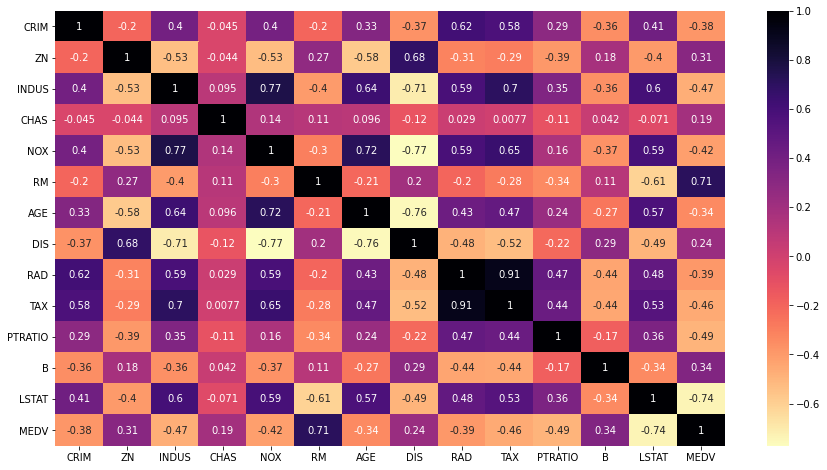

In [71]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
sns.heatmap(boston_data.corr(method = "pearson"), cmap = "magma_r", annot = True)

The correlation matrix gives both positive and negative correlation coeffients. We are interested in knowing the magnitude of the correlation, i.e. the absolute value of the correlation. The higher the absolute correlation of feature variable with respect to our target, the higher is their impact on the target. Hence we include such features in training.

Also, features highly correlated feature variables should not be included in the model training due to non-multicolinearity assumption of linear regression.

Note:
Below are the 4 assumptions of linear regression models:
   - 1. Linearity: The relationship between feature variable and the mean of target is linear.
   - 2. Homoscedasticity: The variance of residual is the same for any value of feature variable.
   - 3. Independence: Observations are independent of each other. (multicolinearity)
   - 4. Normality: For any fixed value of X, Y is normally distributed.
   
These can be assessed using a residual plot


We may identify a threshhold value of correlation coefficient to include/exclude features for our training. This is an iterative process to see by including which features our model performs better.

In [89]:
def get_correlation_coef(data, threshold):
    corr_data = abs(data.corr(method="pearson")["MEDV"])
    return corr_data[corr_data > threshold].sort_values()

In [173]:
threshold = 0.2

boston_corr_data = boston_data[get_correlation_coef(boston_data, threshold).index.values]

## Train Test Split

In [174]:
X = boston_corr_data.drop(columns = ["MEDV"])
y = boston_corr_data["MEDV"]

print("Shape of X (feature set): " , X.shape)
print("Shape of y (target set): ", y.shape)

Shape of X (feature set):  (404, 12)
Shape of y (target set):  (404,)


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 420)

## Model training

In [176]:
lin_reg_model = linear_model.LinearRegression()

In [177]:
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [178]:
y_train_predict = lin_reg_model.predict(X_train)

Model performance

In [180]:
train_rmse = mean_squared_error(y_train, y_train_predict, squared = False)
train_r2 = r2_score(y_train, y_train_predict)

print("Root Mean Squred Error:", train_rmse.round(3))
print("R2 Score:", train_r2.round(3))

Root Mean Squred Error: 4.602
R2 Score: 0.757


Residual plot

In [181]:
residual_df = pd.DataFrame({ "y_train": y_train, "y_train_predict": y_train_predict, "residual": (y_train_predict - y_train)})

In [182]:
X_train_residual_df = pd.concat([X_train, residual_df], axis=1)

In [183]:
X_train_residual_df.head()

,DIS,ZN,B,AGE,CRIM,RAD,NOX,TAX,INDUS,PTRATIO,RM,LSTAT,y_train,y_train_predict,residual
336,1.9512,0.0,383.32,88.0,14.33370,24.0,0.614,666.0,18.10,20.2,6.229,13.11,21.4,21.933394,0.533394
257,3.2157,0.0,387.38,86.5,0.38214,8.0,0.504,307.0,6.20,17.4,8.040,3.13,37.6,38.895582,1.295582
254,6.3361,90.0,386.34,34.2,0.01538,3.0,0.394,244.0,3.75,15.9,7.454,3.11,44.0,37.327296,-6.672704
278,1.9682,0.0,60.72,95.6,9.33889,24.0,0.679,666.0,18.10,20.2,6.380,24.08,9.5,12.445117,2.945117
123,3.3779,0.0,377.56,61.4,0.09744,5.0,0.499,279.0,5.96,19.2,5.841,11.41,20.0,21.838296,1.838296


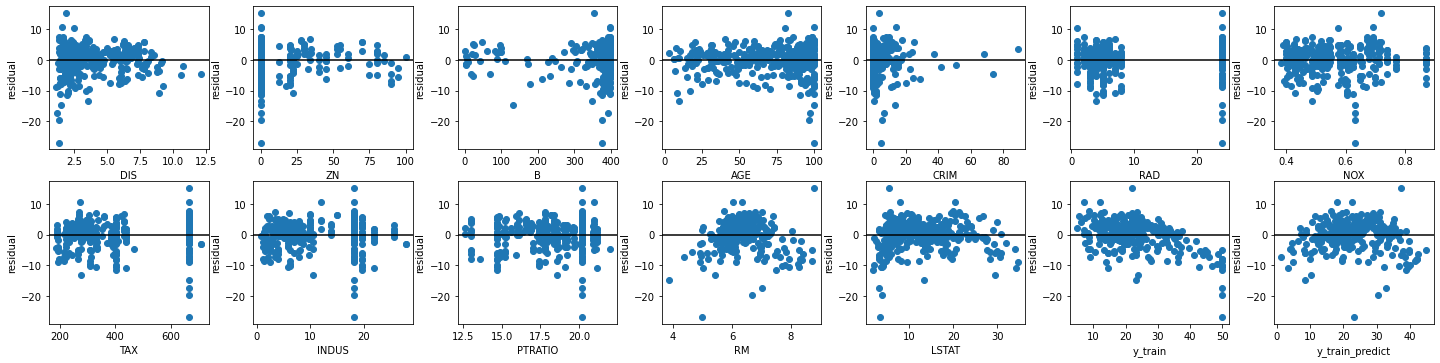

In [223]:
plot_rows = 2
plot_columns = 7

fig, ax = plt.subplots(nrows = plot_rows, ncols= plot_columns, figsize=(20, 5))
plt.tight_layout()

index = 0
cols = X_train_residual_df.columns.values

for i in range(plot_rows):
    for j in range(plot_columns):
       ax[i, j].scatter(X_train_residual_df[cols[index]], X_train_residual_df["residual"])
       ax[i, j].set_xlabel(cols[index])
       ax[i, j].set_ylabel("residual")
       ax[i, j].axhline(color = "k")
       index = index + 1

(to be continued...)